# Initial EDA
The purpose of this notebook is to do an early analysis of the data to understand basic statistics around each feature, as well as relationships between the features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files
import io

### Columns in Dataset
All are categorical excpet age, trestbps, chol, thalach, oldpeak
- age (int): patient's age
- sex (int): patient's sex -- 1=male
- cp (int): chest pain type (0-3),
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
- trestbps (int): resting blood pressure (in mm Hg on admission to the hospital)
- chol (int): serum cholestoral in mg/dl
- fbs (int): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restcg (int): resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach (int): maximum heart rate achieved
- exang (int): exercise induced angina (1 = yes; 0 = no)
- oldpeak (float): ST depression induced by exercise relative to rest
- slope (int): the slope of the peak exercise ST segment
    - 0: upsloping
    - 1: flat
    - 2: downsloping
- ca (int): number of major vessels (0-3) colored by flourosopy
- thal (int): blood disorder called thalassemia
    - 0: NULL, previously dropped from dataset
    - 1: fixed defect
    - 2: normal blood flow
    - 3: reversible defect
- target (int): diagnosis of heart disease (angiographic disease status)
    - 0: < 50% diameter narrowing
    - 1: > 50% diameter narrowing (small diameter of artery is bad)

In [2]:
def getDfSummary(input_data):
    "Gives a slightly more robust initial EDA compared to pd.decribe()"
    #start by getting the stats that describe already gives us, 
        #then transpose this (gets us mean, max, min, std, 25%, 50%, 75%)
    output_data = input_data.describe()
    output_data = output_data.transpose()
    
    #get the median of each column as well
    output_data['median'] = np.median(input_data, axis=0)
    
    #to get distinct counts, first use the nunique function
    #turn this series into a new data frame and merge it with the one from above
    uniques = input_data.nunique(0)
    ph = uniques.to_frame(name='number_distinct')
    output_data = pd.merge(output_data,ph,left_index=True,right_index=True)
        
    #using the count total, get the total number of rows and take this difference to get number_nan
    numrows = len(input_data.index)
    output_data['number_nan'] = output_data['count'].apply(lambda x: numrows - x) 

    return output_data

In [3]:
#read in the dataset
  # be sure to have the file saved locally and manually select 'heart.csv'
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
getDfSummary(df)

Saving heart.csv to heart.csv


,count,mean,std,min,25%,50%,75%,max,median,number_distinct,number_nan
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0,55.0,41,0.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0,1.0,2,0.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0,1.0,4,0.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0,130.0,49,0.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0,240.0,152,0.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0,0.0,2,0.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0,1.0,3,0.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0,153.0,91,0.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0,0.0,2,0.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2,0.8,40,0.0


In [4]:
#split out columns by continuous features, discrete features and the target
cont_feats = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
discrete_feats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
target = ['target']

### Pairplots for continuous features

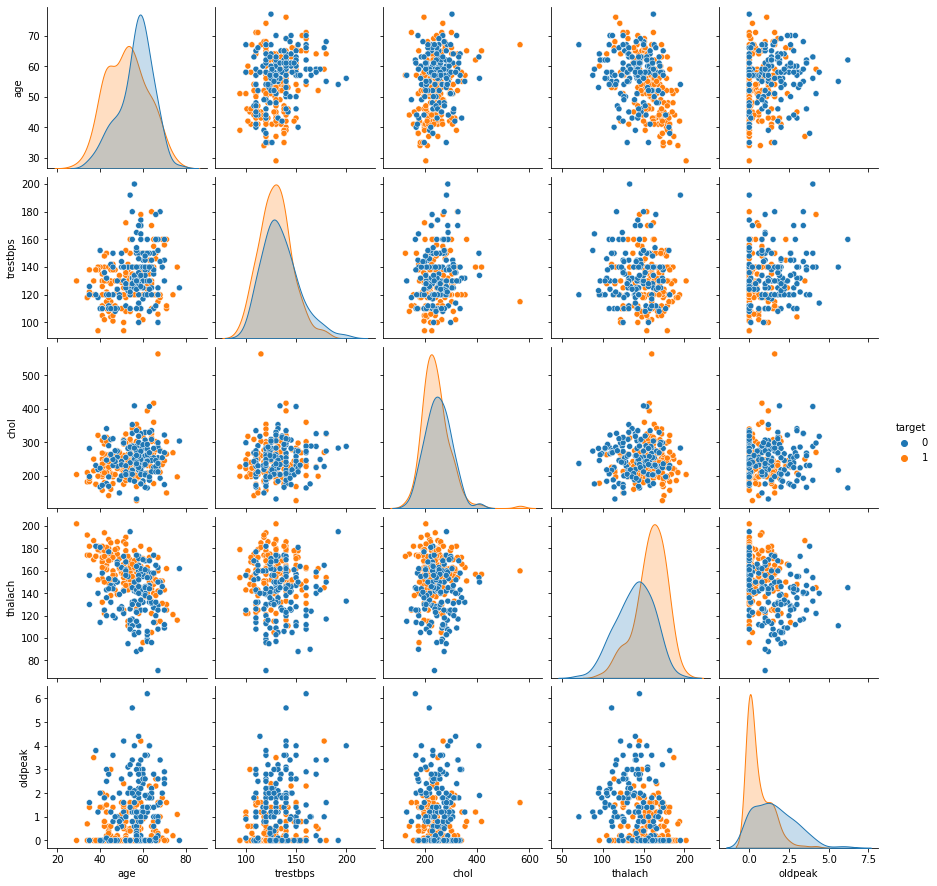

In [7]:
#do pairplots only on continuous features - with target overlay
sns.pairplot(df[cont_feats+target], hue=target[0])
plt.show()

### Histograms for discrete features

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


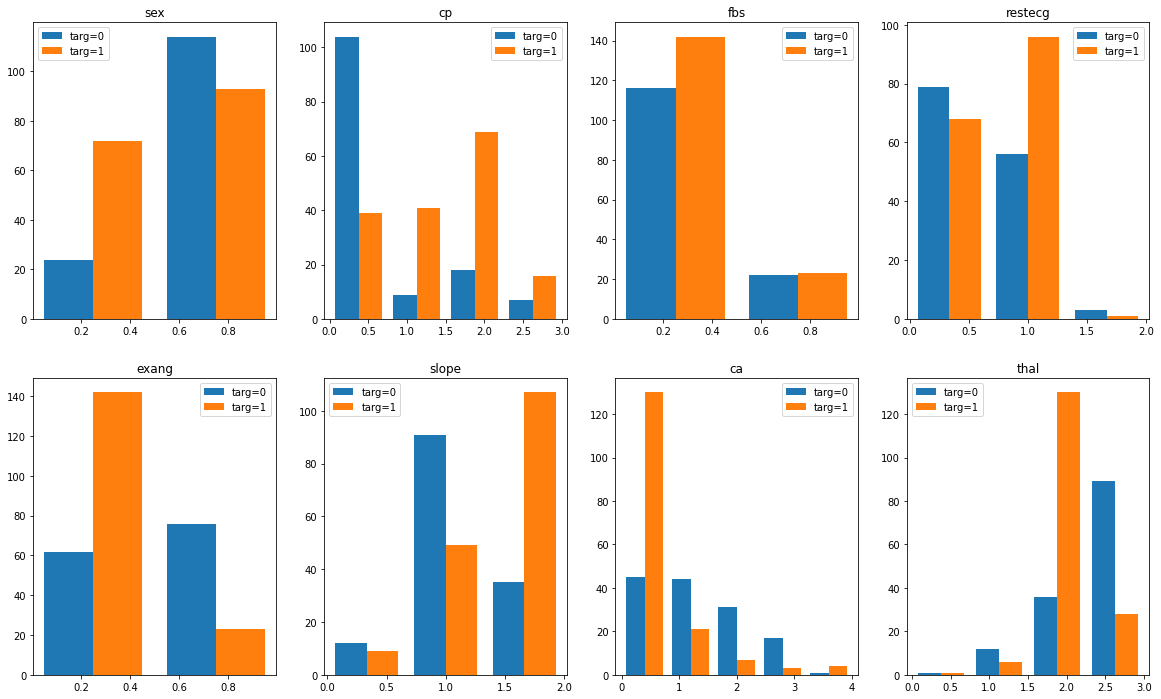

In [8]:
#get separate dataframes for each class of target
df_pos = df.loc[df.target==1].astype(object)
df_neg = df.loc[df.target==0].astype(object)

fig, ax = plt.subplots(2,4,figsize=(20,12))

for n, f in enumerate(discrete_feats):
    ax[int(np.floor(n/4)),n%4].hist([df_neg[f], df_pos[f]],
                                    bins = max(len(np.unique(df_neg[f])),len(np.unique(df_pos[f]))), 
                                    label=['targ=0','targ=1'])
    ax[int(np.floor(n/4)),n%4].legend(loc='best')
    ax[int(np.floor(n/4)),n%4].set_title(f)

### Cleaner Versions with Select Features for Write Up

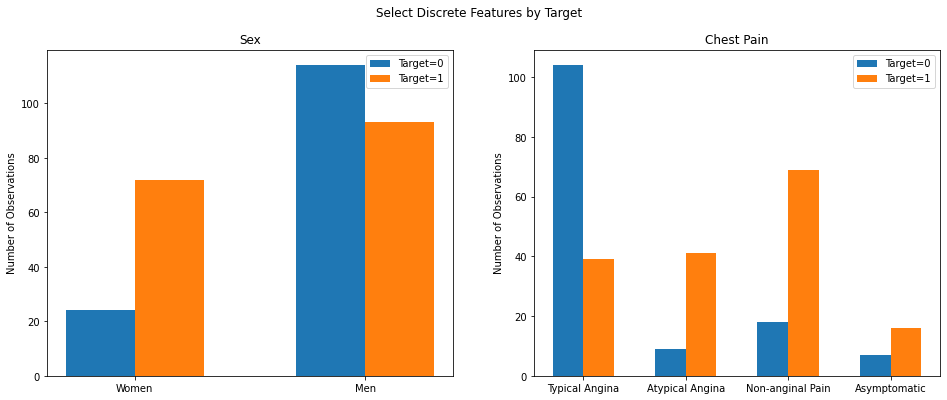

In [9]:
col = ['sex', 'cp']

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Select Discrete Features by Target')

for i in range(2):
    x = np.arange(len(df_neg[col[i]].value_counts())) #number of ticks
    y1 = df_neg[col[i]].value_counts().sort_index() #targ=0 datapoints
    y2 = df_pos[col[i]].value_counts().sort_index() #targ=1 datapoints 
    width = 0.3
  
    # plot data in grouped manner of bar type
    ax[i].bar(x-0.15, y1, width, label='Target=0')
    ax[i].bar(x+0.15, y2, width, label='Target=1')
    
    ax[i].set_ylabel('Number of Observations')
    ax[i].legend(loc='best')
    ax[i].set_xticks(x)
    

ax[0].set_xticklabels(('Women', 'Men'))
ax[1].set_xticklabels(('Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'))
ax[0].set_title('Sex')
ax[1].set_title('Chest Pain')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

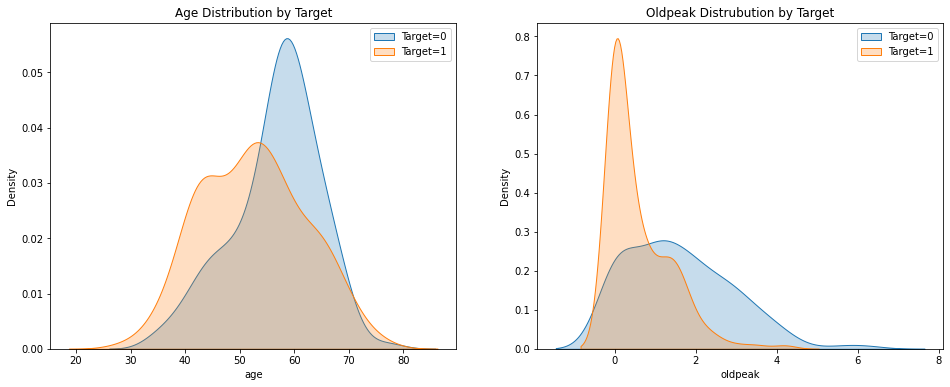

In [16]:
#use the sns plot for age and oldpeak dist

fig, ax = plt.subplots(1,2, figsize=(16,6))    

# Draw the density plots
sns.distplot(df_neg.age, hist = False, kde = True, ax=ax[0],
             kde_kws = {'shade': True},
             label = 'Target=0')
sns.distplot(df_pos.age, hist = False, kde = True, ax=ax[0],
             kde_kws = {'shade': True},
             label = 'Target=1')

sns.distplot(df_neg.oldpeak, hist = False, kde = True, ax=ax[1],
             kde_kws = {'shade': True},
             label = 'Target=0')
sns.distplot(df_pos.oldpeak, hist = False, kde = True, ax=ax[1],
             kde_kws = {'shade': True},
             label = 'Target=1')

# Plot formatting
ax[0].set_title('Age Distribution by Target')
ax[1].set_title('Oldpeak Distrubution by Target')
for i in range(2):
    ax[i].legend(loc='best')
    ax[i].set_ylabel('Density')
    
plt.show()

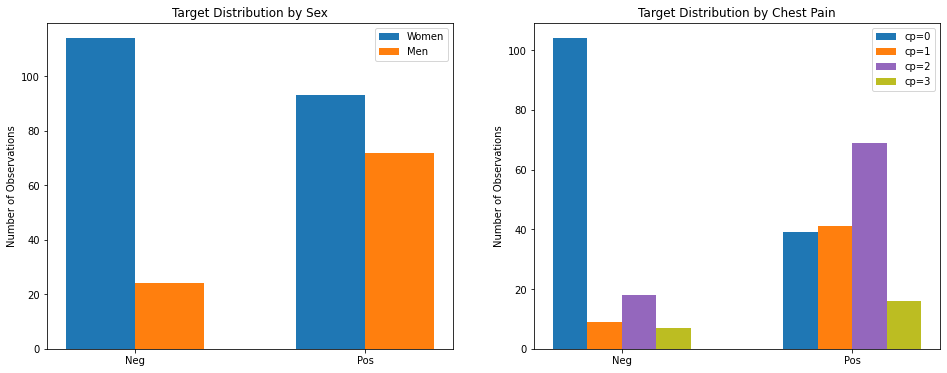

In [17]:
#create dfs for subplots
df_w = df.loc[df.sex==1].astype(object)
df_m = df.loc[df.sex==0].astype(object)


#create dfs for subplots
df_cp0 = df.loc[df.cp==0].astype(object)
df_cp1 = df.loc[df.cp==1].astype(object)
df_cp2 = df.loc[df.cp==2].astype(object)
df_cp3 = df.loc[df.cp==3].astype(object)


fig, ax = plt.subplots(1,2, figsize=(16,6))

x = np.arange(2) 
y1 = df_w.target.value_counts().sort_index() 
y2 = df_m.target.value_counts().sort_index() 
y3 = df_cp0.target.value_counts().sort_index() 
y4 = df_cp1.target.value_counts().sort_index() 
y5 = df_cp2.target.value_counts().sort_index() 
y6 = df_cp3.target.value_counts().sort_index() 

width_0 = 0.3
width_1 = 0.15


# plot data in grouped manner of bar type
ax[0].bar(x-0.15, y1, width_0, label='Women')
ax[0].bar(x+0.15, y2, width_0, label='Men')

ax[1].bar(x-0.225, y3, width_1, label='cp=0', color='tab:blue')
ax[1].bar(x-0.075, y4, width_1, label='cp=1', color='tab:orange')
ax[1].bar(x+0.075, y5, width_1, label='cp=2', color='tab:purple')
ax[1].bar(x+0.225, y6, width_1, label='cp=3', color='tab:olive')

ax[0].set_title('Target Distribution by Sex')
ax[1].set_title('Target Distribution by Chest Pain')

for i in range(2):
    ax[i].set_ylabel('Number of Observations')
    ax[i].legend(loc='best')

    ax[i].set_xticks(x)
    ax[i].set_xticklabels(('Neg', 'Pos'))

plt.show()

### Correlation Matrix

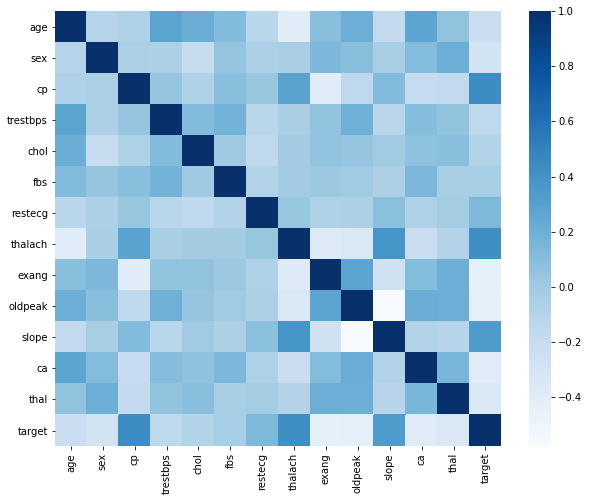

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [18]:
#full correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='Blues')
plt.show()

df.corr()

### Crosstabs

In [24]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


In [20]:
pd.crosstab(df['target'], df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


In [21]:
pd.crosstab(df['target'], df['slope'])

slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


In [22]:
pd.crosstab(df['target'], df['exang'])

exang,0,1
target,,
0,62,76
1,142,23
